# Emily Tseng (et397) - Ex5

## 1A) Stylometrics

In [183]:
import urllib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from collections import Counter

In [184]:
import nltk
from nltk.corpus import gutenberg

In [185]:
shakespeare = [fileid for fileid in gutenberg.fileids() if fileid.startswith('shakespeare')]
milton = [fileid for fileid in gutenberg.fileids() if fileid.startswith('milton')]

austen = [fileid for fileid in gutenberg.fileids() if fileid.startswith('austen')]
melville = [fileid for fileid in gutenberg.fileids() if fileid.startswith('melville')]

In [186]:
shw = [w.lower() for fileid in shakespeare for w in gutenberg.words(fileid) if w[0].isalpha()]
mpw = [w.lower() for w in gutenberg.words('milton-paradise.txt') if w[0].isalpha()]
apw = [w.lower() for w in gutenberg.words('austen-persuasion.txt') if w[0].isalpha()]
mdw = [w.lower() for w in gutenberg.words('melville-moby_dick.txt') if w[0].isalpha()]

In [188]:
mdw = mdw[:80000] #truncating moby dick to the first 80k words

In [189]:
fdist = Counter(shw + mpw + apw + mdw) #for all 4 authors
top50_2,_ = zip(*fdist.most_common(50)) #just use top 50 from combined
print(top50_2)

('the', 'and', 'of', 'to', 'in', 'a', 'i', 'that', 'his', 'with', 'it', 'he', 'not', 'but', 'as', 'was', 'for', 'be', 'all', 'you', 'is', 'her', 'had', 'him', 'this', 'my', 's', 'on', 'by', 'so', 'from', 'at', 'or', 'she', 'me', 'what', 'they', 'their', 'which', 'no', 'have', 'there', 'now', 'more', 'will', 'were', 'we', 'them', 'thou', 'when')


In [190]:
M2=[]
for corp in [shw, mpw, apw, mdw]:
  for i in range(0,len(corp)-4999,5000):  # 13 blocks of shakespeare, 16 of milton, 16 of austen, 16 of melville
    fdist = Counter(corp[i:i+5000])
    M2.append([fdist[w] for w in top50_2])
M2 = np.array(M2).astype(np.float64) #convert integers to floating point array
assert len(M2) == 61

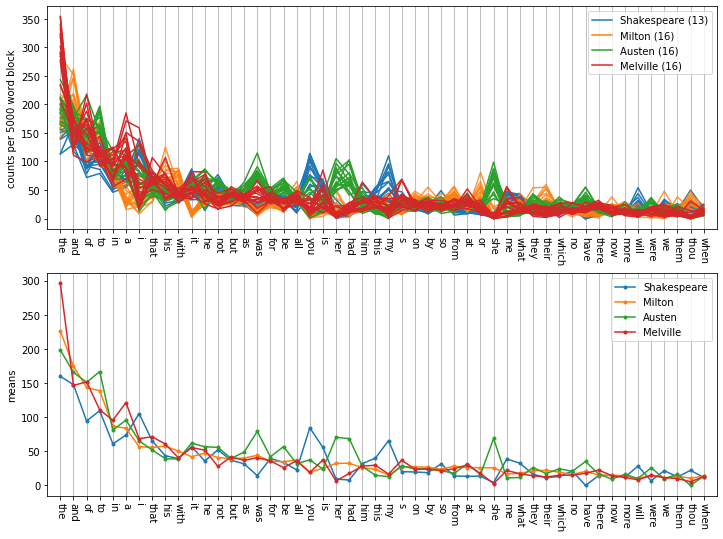

In [191]:
C = plt.rcParams['axes.prop_cycle'].by_key()['color'] #default colorcycle

def plot_format(ylab=''):
    plt.xticks(range(50), top50_2, rotation=270)
    plt.xlim(-1,50)
    plt.grid(axis='x')
    plt.ylabel(ylab)
    plt.legend()

plt.figure(figsize=(12,9))

plt.subplot(211)
plt.plot(M2[:13].T, C[0]) #shakespeare blocks in blue
plt.plot(M2[13:(13+16)].T, C[1], alpha=.8) #milton blocks in orange
plt.plot(M2[(13+16):(13+16+16)].T, C[2]) #austen blocks
plt.plot(M2[(13+16+16):].T, C[3]) #melville blocks
plt.plot([-1],[100],label='Shakespeare (13)') # points out of view
plt.plot([-1],[100],label='Milton (16)')      
plt.plot([-1],[100],label='Austen (16)')    
plt.plot([-1],[100],label='Melville (16)')      
plot_format('counts per 5000 word block')

plt.subplot(212)
plt.plot(M2[:13].mean(0), '.-', label='Shakespeare') #shakespeare blocks in blue
plt.plot(M2[13:].mean(0), '.-', label='Milton') #milton blocks in orange
plt.plot(M2[(13+16):(13+16+16)].mean(0), '.-', label='Austen') 
plt.plot(M2[(13+16+16):].mean(0), '.-', label='Melville') 
plot_format('means')

In [192]:
scaler2 = preprocessing.StandardScaler()
M2_scaled = scaler2.fit_transform(M2)

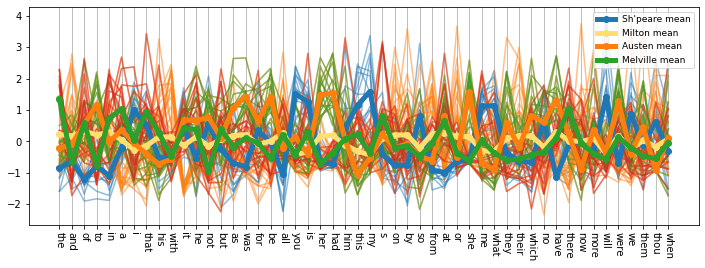

In [193]:
plt.figure(figsize=(12,4))
plt.plot(M2_scaled[:13].T, C[0], alpha=.5) #shakespeare
plt.plot(M2_scaled[13:].T, C[1], alpha=.5) #milton
plt.plot(M2_scaled[(13+16):(13+16+16)].T, C[2], alpha=.5) #austen blocks
plt.plot(M2_scaled[(13+16+16):].T, C[3], alpha=.5) #melville blocks

plt.plot(M2_scaled[:13].mean(0),'o-', lw=5, label='Sh\'peare mean')
plt.plot(M2_scaled[13:].mean(0),'o-', lw=5, color='#ffdf6e', label='Milton mean')
plt.plot(M2_scaled[(13+16):(13+16+16)].mean(0), 'o-', lw=5, label='Austen mean') 
plt.plot(M2_scaled[(13+16+16):].mean(0), 'o-', lw=5, label='Melville mean') 

plt.grid(axis='x')
plt.legend(loc='upper right', fontsize=9)
plt.xticks(range(50), top50_2, rotation=270);

In [194]:
pca2 = PCA(n_components=3)
M2_new = pca2.fit_transform(M2_scaled)
evr=pca2.explained_variance_ratio_
print ('explained variance ratio:', evr, sum(evr))  #eigenvalues, scaled to sum to 1

explained variance ratio: [0.24456369 0.2162239  0.10819886] 0.5689864541888892


In [195]:
M2_new.shape

(61, 3)

In [196]:
from mpl_toolkits.mplot3d import Axes3D

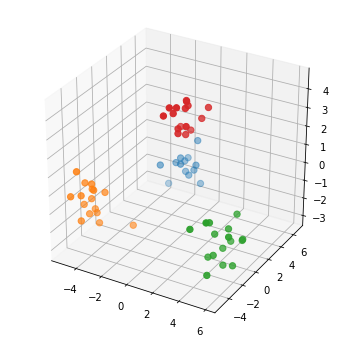

In [197]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*M2_new.T, s=40, c=[C[0]]*13 + [C[1]]*16 + [C[2]]*16 + [C[3]] *16)

## 1B)

In [198]:
km2=KMeans(4).fit(M2_new)
means2=km2.cluster_centers_
means2

array([[ 4.80373465, -1.54657677, -1.77764063],
       [-1.59195519,  5.20537382, -1.08712676],
       [-4.38394634, -3.11245907, -0.89044917],
       [ 0.87367529,  0.42966961,  3.55138028]])

In [199]:
test = list()

# 1) the remaining portion of Melville (i.e., from word 80000 on, there should be 27 more blocks of 5000 words)
mdw = [w.lower() for w in gutenberg.words('melville-moby_dick.txt') if w[0].isalpha()]
test_melville = mdw[80000:]

# 2) Also try the combined 'austen-emma.txt' and 'austen-sense.txt' (56 more blocks of 5000 words)
test_austen = [w.lower() for w in gutenberg.words('austen-emma.txt') if w[0].isalpha()]
test_austen += [w.lower() for w in gutenberg.words('austen-sense.txt') if w[0].isalpha()]

# 3) nltk.corpus.shakespeare contains eight more Shakespeare plays (another 39 blocks of 5000 words)
extra_shakespeare = [fileid for fileid in nltk.corpus.shakespeare.fileids()]
test_shakes = [w.lower() for fileid in extra_shakespeare for w in nltk.corpus.shakespeare.words(fileid) if w[0].isalpha()]

# 4) Also try some other Milton text, e.g., Paradise Regained from Gutenberg.org
paradise_r_url = 'http://www.gutenberg.org/cache/epub/58/pg58.txt'
paradise_r = urllib.request.urlopen(paradise_r_url).read().decode('utf-8')
test_milton = [w.lower() for w in nltk.word_tokenize(paradise_r[540:100260]) if w[0].isalpha()]

In [200]:
test = list()
for test_corp in [test_shakes, test_milton, test_austen, test_melville]:
    for i in range(0, len(test_corp)-4999,5000):
        fdist2 = Counter(test_corp[i:i+5000])
        test.append([fdist2[w] for w in top50_2])
test = np.array(test).astype(np.float64)
test = pca2.transform(scaler2.transform(test))

In [201]:
train = M2
train_predictions = km2.predict(pca2.transform(scaler2.transform(train)))
train_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [202]:
test_predictions = km2.predict(test)
test_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [203]:
# See if any of the blocks of test data are classified incorrectly by the k-means classifier
correct = [1]*39 + [2]*3 + [0]*56 + [3]*27  
correct = np.array(correct)
correct != test_predictions

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

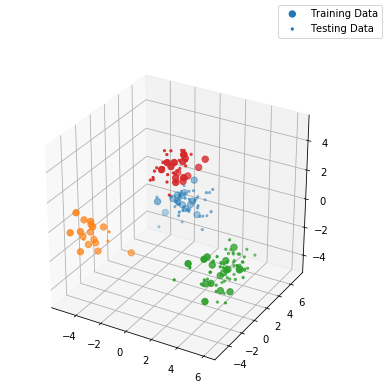

In [204]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*M2_new.T, s=40, c=[C[0]]*13 + [C[1]]*16 + [C[2]]*16 + [C[3]] *16, label="Training Data")
ax.scatter(*test.T, marker=".", c=[C[0]]*39 + [C[1]]*3 + [C[2]]*56 + [C[3]]*27, label="Testing Data")
fig.legend()

## 2A)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree

In [2]:
df = pd.read_csv('parsed_compas-scores.csv')
df

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,r_charge_degree,is_violent_recid,vr_charge_degree,v_score,r_score
0,1,2,1,0,0,0,0,2,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,-1,0,0,0,0,1
2,1,1,5,0,0,0,0,2,1,2,1,2,0,0
3,1,0,5,0,0,1,4,2,1,1,0,0,0,0
4,1,0,5,0,1,0,1,2,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11737,1,2,1,0,0,0,1,2,0,0,0,0,0,0
11738,1,0,2,0,3,5,3,1,1,1,0,0,1,1
11739,1,1,1,0,0,0,0,1,0,0,0,0,0,0
11740,1,1,2,0,0,0,2,1,0,0,0,0,0,0


In [207]:
X_train = df[list(filter(lambda x: x != 'v_score' and x != 'r_score', df.columns))]

In [208]:
# i) First train on the full 11742 entry dataset, just to determine the overall ability to fit the data. What is the overall training set accuracy in each case? (Why is it not 100%?)

In [209]:
# First do v_score; ranges from 0-2
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, df['v_score'])
print('v_score: {}pct accurate training with full dataset'.format(np.count_nonzero(v_score_clf.predict(X_train) == df['v_score']) / len(df['v_score'])*100))

# Then do r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, df['r_score'])
print('r_score: {}pct accurate training with full dataset'.format(np.count_nonzero(r_score_clf.predict(X_train) == df['r_score']) / len(df['r_score'])*100))

v_score: 83.11190597853859pct accurate training with full dataset
r_score: 74.21222960313405pct accurate training with full dataset


In [1]:
print('These are likely not 100pct accurate because decision trees must make hard cutoffs and compromise over the entire dataset.')

These are likely not 100pct accurate because decision trees must make hard cutoffs and compromise over the entire dataset.


In [85]:
# ii) What are the top two features returned by the .feature_importances_ attribute in each of the two cases, and how much of the overall explanatory power do they contribute?
feature_indices = np.argsort(v_score_clf.feature_importances_)[-2:]
print('top two features for v_score: {}, {}'.format(*df.columns[feature_indices]))
print('overall explanatory power contributed by these two features: {}pct'.format(100*sum(v_score_clf.feature_importances_[feature_indices])))

feature_indices = np.argsort(r_score_clf.feature_importances_)[-2:]
print('top two features for r_score: {}, {}'.format(*df.columns[feature_indices]))
print('overall explanatory power contributed by these two features: {}pct'.format(100*sum(r_score_clf.feature_importances_[feature_indices])))

top two features for v_score: priors_count, age_cat
overall explanatory power contributed by these two features: 58.14098438219975pct
top two features for r_score: age_cat, priors_count
overall explanatory power contributed by these two features: 50.32598664177053pct


In [86]:
# iii) How much does race contribute to the overall explanatory power? (In this case we're using race as a proxy for missing features that may be correlated with it)

print('v_score: ', v_score_clf.feature_importances_[list(df.columns).index('race')])
print('r_score: ', r_score_clf.feature_importances_[list(df.columns).index('race')])

v_score:  0.08260615920519813
r_score:  0.11426853044768466


Text(0.5, 1.0, 'r_score decision tree')

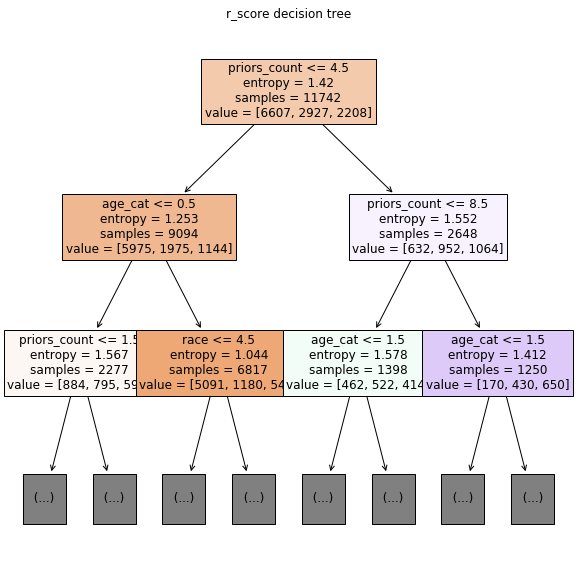

In [87]:
# iv) Plot a decision tree for each case: note that since these trees are very deep, you should use max_depth=2 as an argument to tree.plot_tree() (otherwise it might hang); also you should use the feature_names= and class_names= parameters to make it easier to read (setting fontsize= larger might also help), and filled=True will indicate the classes by color.

plt.figure(figsize=(10,10))
tree.plot_tree(r_score_clf, max_depth=2, fontsize='larger', filled=True, feature_names=df.columns)
plt.title('r_score decision tree')

Text(0.5, 1.0, 'v_score decision tree')

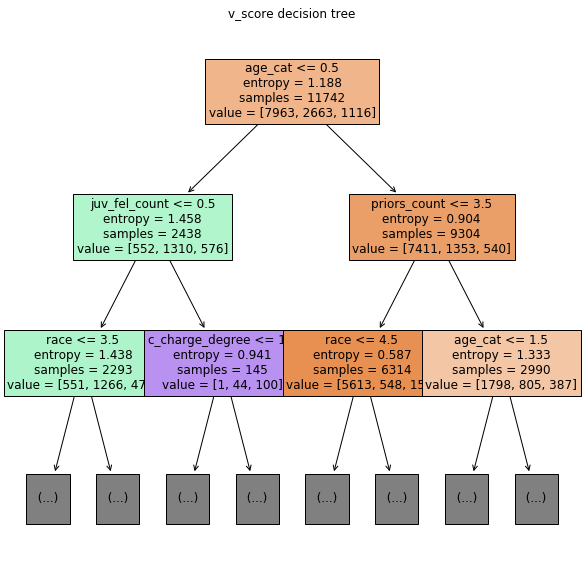

In [88]:
plt.figure(figsize=(10,10))
tree.plot_tree(v_score_clf, max_depth=2, fontsize='larger', filled=True, feature_names=df.columns)
plt.title('v_score decision tree')

## 2B)

In [20]:
from sklearn.model_selection import cross_val_score

In [90]:
# v_score
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(v_score_clf, X_train, y=df['v_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('v_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

# r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(r_score_clf, X_train, y=df['r_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('r_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

v_score achieves 72.661859536793pct accuracy over 10fold cross-val
r_score achieves 61.38612880657879pct accuracy over 10fold cross-val


In [91]:
print('These are both lower accuracies than the training set accuracies produced because 10-fold cross-val tests over a held-out test set vs. datapoints the model has seen in training.')

These are both lower accuracies than the training set accuracies produced because 10-fold cross-val tests over a held-out test set vs. datapoints the model has seen in training.


## 2C)

In [93]:
# i)
print('For the top two most important features in both cases...')
X_top_two = df[['age_cat', 'priors_count']]

For the top two most important features in both cases...


In [94]:
# First do v_score; ranges from 0-2
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_top_two, df['v_score'])
print('v_score: {}pct accurate training with full dataset'.format(np.count_nonzero(v_score_clf.predict(X_top_two) == df['v_score']) / len(df['v_score'])*100))

# Then do r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_top_two, df['r_score'])
print('r_score: {}pct accurate training with full dataset'.format(np.count_nonzero(r_score_clf.predict(X_top_two) == df['r_score']) / len(df['r_score'])*100))

v_score: 74.82541304718106pct accurate training with full dataset
r_score: 64.07766990291263pct accurate training with full dataset


In [95]:
# v_score
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(v_score_clf, X_top_two, y=df['v_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('v_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

# r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(r_score_clf, X_top_two, y=df['r_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('r_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

v_score achieves 74.21221773651317pct accuracy over 10fold cross-val
r_score achieves 63.43043161918467pct accuracy over 10fold cross-val


In [98]:
# ii)
print('For the top three most important features...')
# First do v_score; ranges from 0-2
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, df['v_score'])
print('v_score: {}pct accurate training with full dataset'.format(np.count_nonzero(v_score_clf.predict(X_train) == df['v_score']) / len(df['v_score'])*100))

# Then do r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, df['r_score'])
print('r_score: {}pct accurate training with full dataset'.format(np.count_nonzero(r_score_clf.predict(X_train) == df['r_score']) / len(df['r_score'])*100))

# ii) What are the top two features returned by the .feature_importances_ attribute in each of the two cases, and how much of the overall explanatory power do they contribute?
feature_indices = np.argsort(v_score_clf.feature_importances_)[-3:]
print('top two features for v_score: {}, {}, {}'.format(*df.columns[feature_indices]))
print('overall explanatory power contributed by these two features: {}pct'.format(100*sum(v_score_clf.feature_importances_[feature_indices])))

feature_indices = np.argsort(r_score_clf.feature_importances_)[-3:]
print('top two features for r_score: {}, {}, {}'.format(*df.columns[feature_indices]))
print('overall explanatory power contributed by these two features: {}pct'.format(100*sum(r_score_clf.feature_importances_[feature_indices])))
X_top_three = df[['race', 'priors_count', 'age_cat']]

For the top three most important features...
v_score: 83.11190597853859pct accurate training with full dataset
r_score: 74.21222960313405pct accurate training with full dataset
top two features for v_score: race, priors_count, age_cat
overall explanatory power contributed by these two features: 66.2892081627394pct
top two features for r_score: race, age_cat, priors_count
overall explanatory power contributed by these two features: 61.838597313659186pct


In [99]:
# First do v_score; ranges from 0-2
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_top_three, df['v_score'])
print('v_score: {}pct accurate training with full dataset'.format(np.count_nonzero(v_score_clf.predict(X_top_three) == df['v_score']) / len(df['v_score'])*100))

# Then do r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_top_three, df['r_score'])
print('r_score: {}pct accurate training with full dataset'.format(np.count_nonzero(r_score_clf.predict(X_top_three) == df['r_score']) / len(df['r_score'])*100))

v_score: 75.25123488332481pct accurate training with full dataset
r_score: 65.0485436893204pct accurate training with full dataset


In [100]:
# v_score
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(v_score_clf, X_top_three, y=df['v_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('v_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

# r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(r_score_clf, X_top_three, y=df['r_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('r_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

v_score achieves 73.59908877261002pct accuracy over 10fold cross-val
r_score achieves 63.65179531742668pct accuracy over 10fold cross-val


## 2D)

In [3]:
non_score_cols = list(filter(lambda x: x != 'v_score' and x != 'r_score', df.columns))

In [4]:
df2 = df.copy()
df2 = df[non_score_cols]

In [5]:
duplicates = df2[df2.duplicated(keep=False)]
dup_groups = duplicates.groupby(non_score_cols).apply(lambda x: list(x.index)).tolist()
len(dup_groups)

977

In [6]:
no_duplicates = df.drop_duplicates(keep=False, inplace=False, subset=non_score_cols)
no_duplicates

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,r_charge_degree,is_violent_recid,vr_charge_degree,v_score,r_score
3,1,0,5,0,0,1,4,2,1,1,0,0,0,0
7,1,1,2,0,0,0,14,2,1,2,0,0,0,1
12,1,0,2,0,0,0,1,2,1,1,1,2,1,0
18,0,2,2,0,0,0,1,2,1,2,0,0,0,0
38,1,1,5,0,0,0,0,2,1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11703,0,2,3,0,0,0,1,1,1,1,0,0,0,0
11718,1,1,5,2,0,0,21,2,1,1,0,0,2,2
11720,1,1,3,1,5,0,29,2,0,0,0,0,0,2
11721,1,2,5,0,0,0,14,2,1,1,0,0,0,1


In [7]:
from scipy import stats

new_rows = list()
for group in dup_groups:
    rows = df.iloc[group]
    new_row = list(*stats.mode(rows)[0])
    new_rows.append(new_row)

In [8]:
new_df = pd.DataFrame(new_rows, columns=df.columns)
new_df

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,r_charge_degree,is_violent_recid,vr_charge_degree,v_score,r_score
0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,2,0,0,0,0,0,0
2,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,0,0,1,0,0,0,1,2,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1,2,5,0,0,0,22,2,1,2,0,0,0,1
973,1,2,5,0,0,0,23,2,1,2,0,0,0,0
974,1,2,5,0,0,0,25,2,0,0,0,0,0,1
975,1,2,5,0,0,0,26,2,0,0,0,0,0,1


In [9]:
clean_df = pd.concat([no_duplicates, new_df])
clean_df

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,r_charge_degree,is_violent_recid,vr_charge_degree,v_score,r_score
3,1,0,5,0,0,1,4,2,1,1,0,0,0,0
7,1,1,2,0,0,0,14,2,1,2,0,0,0,1
12,1,0,2,0,0,0,1,2,1,1,1,2,1,0
18,0,2,2,0,0,0,1,2,1,2,0,0,0,0
38,1,1,5,0,0,0,0,2,1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1,2,5,0,0,0,22,2,1,2,0,0,0,1
973,1,2,5,0,0,0,23,2,1,2,0,0,0,0
974,1,2,5,0,0,0,25,2,0,0,0,0,0,1
975,1,2,5,0,0,0,26,2,0,0,0,0,0,1


In [10]:
X_clean = clean_df[non_score_cols]

In [15]:
# First do v_score; ranges from 0-2
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_clean, clean_df['v_score'])
print('v_score: {}pct accurate training with cleaned dataset'.format(np.count_nonzero(v_score_clf.predict(X_clean) == clean_df['v_score']) / len(clean_df['v_score'])*100))

# Then do r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_clean, clean_df['r_score'])
print('r_score: {}pct accurate training with cleaned dataset'.format(np.count_nonzero(r_score_clf.predict(X_clean) == clean_df['r_score']) / len(clean_df['r_score'])*100))

v_score: 100.0pct accurate training with cleaned dataset
r_score: 100.0pct accurate training with cleaned dataset


In [16]:
# ii) What are the top two features returned by the .feature_importances_ attribute in each of the two cases, and how much of the overall explanatory power do they contribute?
feature_indices = np.argsort(v_score_clf.feature_importances_)[-2:]
print('top two features for v_score: {}, {}'.format(*df.columns[feature_indices]))
print('overall explanatory power contributed by these two features: {}pct'.format(100*sum(v_score_clf.feature_importances_[feature_indices])))

feature_indices = np.argsort(r_score_clf.feature_importances_)[-2:]
print('top two features for r_score: {}, {}'.format(*df.columns[feature_indices]))
print('overall explanatory power contributed by these two features: {}pct'.format(100*sum(r_score_clf.feature_importances_[feature_indices])))

top two features for v_score: age_cat, priors_count
overall explanatory power contributed by these two features: 43.51436748149061pct
top two features for r_score: race, priors_count
overall explanatory power contributed by these two features: 41.34994098712107pct


In [17]:
# iii) How much does race contribute to the overall explanatory power? (In this case we're using race as a proxy for missing features that may be correlated with it)

print('v_score: ', v_score_clf.feature_importances_[list(df.columns).index('race')])
print('r_score: ', r_score_clf.feature_importances_[list(df.columns).index('race')])

v_score:  0.1043176608890643
r_score:  0.10157924344776614


Text(0.5, 1.0, 'r_score decision tree')

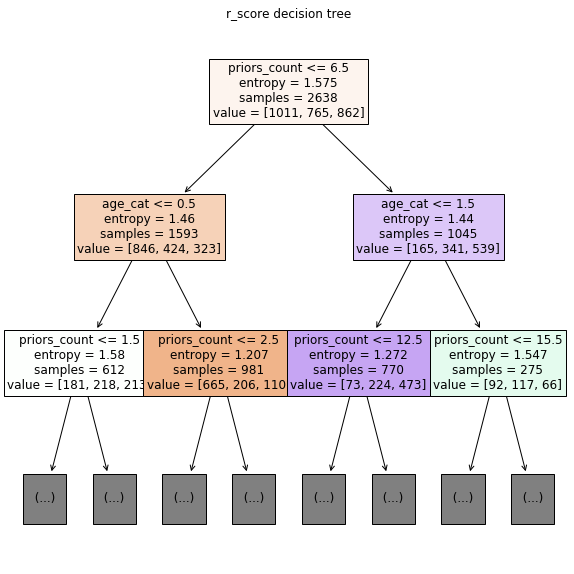

In [18]:
# iv) Plot a decision tree for each case: note that since these trees are very deep, you should use max_depth=2 as an argument to tree.plot_tree() (otherwise it might hang); also you should use the feature_names= and class_names= parameters to make it easier to read (setting fontsize= larger might also help), and filled=True will indicate the classes by color.

plt.figure(figsize=(10,10))
tree.plot_tree(r_score_clf, max_depth=2, fontsize='larger', filled=True, feature_names=df.columns)
plt.title('r_score decision tree')

Text(0.5, 1.0, 'v_score decision tree')

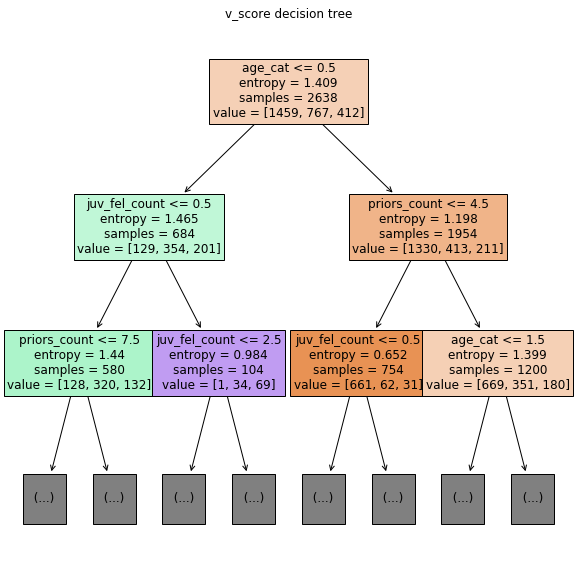

In [19]:
plt.figure(figsize=(10,10))
tree.plot_tree(v_score_clf, max_depth=2, fontsize='larger', filled=True, feature_names=df.columns)
plt.title('v_score decision tree')

In [21]:
# v_score
v_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(v_score_clf, X_clean, y=clean_df['v_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('v_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

# r_score
r_score_clf = tree.DecisionTreeClassifier(criterion='entropy')
accs = cross_val_score(r_score_clf, X_clean, y=clean_df['r_score'], cv=10)
mean_acc = sum(accs) / len(accs)
print('r_score achieves {}pct accuracy over 10fold cross-val'.format(mean_acc*100))

v_score achieves 52.086090688059116pct accuracy over 10fold cross-val
r_score achieves 47.87703733487335pct accuracy over 10fold cross-val
